<a href="https://colab.research.google.com/github/estadisticados6-crypto/Estadistica2025B/blob/main/Consumo_Energia_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [329]:
import pandas as pd
url = "https://raw.githubusercontent.com/estadisticados6-crypto/Estadistica2025B/refs/heads/main/test_energy_data.csv"
df = pd.read_csv(url)
df = df.dropna()
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [330]:
df.columns


Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [331]:
df.columns = ['Building_Type', 'Square_Footage', 'Number_of_Occupants',
       'Appliances_Used', 'Average_Temperature', 'Day_of_Week',
       'Energy_Consumption']
df

,Building_Type,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [332]:
df["Building_Type"].unique()

array(['Residential', 'Commercial', 'Industrial'], dtype=object)

In [333]:
df["Day_of_Week"].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [334]:
import pandas as pd
df["Day_of_Week"] = df["Day_of_Week"].map({"Weekday": 0, "Weekend":1})
df["Building_Type"] = df["Building_Type"].map({"Residential": 0, "Commercial":1, "Industrial":2})
df


,Building_Type,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption
0,0,24563,15,4,28.52,0,2865.57
1,1,27583,56,23,23.07,1,4283.80
2,1,45313,4,44,33.56,0,5067.83
3,0,41625,84,17,27.39,1,4624.30
4,0,36720,58,47,17.08,0,4820.59
...,...,...,...,...,...,...,...
95,1,1161,81,11,15.45,1,3010.81
96,0,37943,50,23,21.73,1,4248.49
97,1,1558,27,29,16.86,1,2843.60
98,2,2145,56,12,11.77,1,3348.39


In [335]:
#ANOVA

from statsmodels.formula.api import ols
import statsmodels.api as sm

# C() -> variable categórica
# H0: No hay diferencia entre grupos
# H1: Al menos un grupo es diferente

modelo_lineal = ols('Energy_Consumption ~ C(Building_Type) + Square_Footage + Number_of_Occupants + Appliances_Used + Average_Temperature + C(Day_of_Week)',
                    data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Building_Type),2.0,1.478319e+07,7.391595e+06,3.746118e+10,0.000000e+00
C(Day_of_Week),1.0,2.727974e+06,2.727974e+06,1.382558e+10,0.000000e+00
Square_Footage,1.0,3.387918e+07,3.387918e+07,1.717023e+11,0.000000e+00
Number_of_Occupants,1.0,9.275636e+06,9.275636e+06,4.700965e+10,0.000000e+00
Appliances_Used,1.0,7.842723e+06,7.842723e+06,3.974753e+10,0.000000e+00
Average_Temperature,1.0,1.137355e+05,1.137355e+05,5.764203e+08,1.815926e-314
Residual,92.0,1.815284e-02,1.973135e-04,NaN,NaN


In [336]:
# a)A partir de los datos disponibles, ¿qué relación parece existir entre el tamaño del edificio (square_footage) y el consumo de energía (energy_kwh)?

In [337]:
x = df["Square_Footage"]
y = df["Energy_Consumption"]

In [338]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# C() -> variable categórica
# H0: No hay diferencia entre grupos
# H1: Al menos un grupo es diferente

modelo_lineal = ols('Energy_Consumption ~ Square_Footage', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
Square_Footage,1.0,3.597413e+07,3.597413e+07,107.983064,1.713693e-17
Residual,98.0,3.264831e+07,3.331460e+05,NaN,NaN


Coeficiente de correlación:  0.7240

Coeficiente de determinación:  0.5242

valor-p de Shapiro:  0.1608

valor_p de Breusch-Pagan:  0.1022



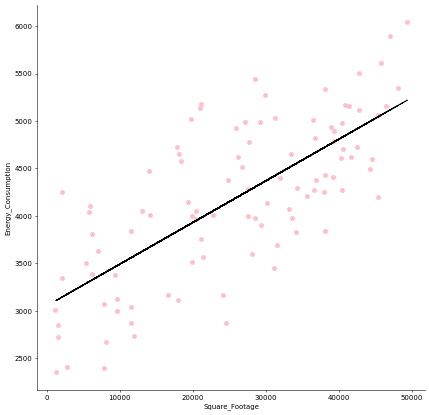

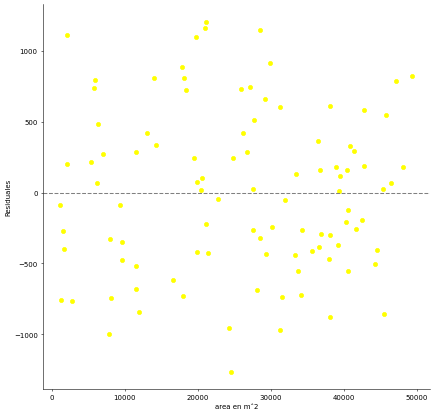

In [339]:
#Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10), dpi = 50)
plt.scatter(x, y, label = "Energy_Consumption", color = 'pink')
plt.xlabel('Square_Footage') # nombrar eje x
plt.ylabel('Energy_Consumption')       # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

#Coeficiente de correlación
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')

#Coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

#Residuales
residuales = modelo.resid
plt.figure(figsize = (10, 10), dpi = 50)
plt.scatter(x, residuales, color = 'yellow')
plt.xlabel('area en mˆ2')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

#Prueba de Shapiro.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#Prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

In [340]:
#b) ¿Qué tipo de relación observas entre el número de ocupantes (occupants) y el consumo de energía?

In [341]:
x = df["Number_of_Occupants"]
y = df["Energy_Consumption"]

In [342]:
#ANOVA

from statsmodels.formula.api import ols
import statsmodels.api as sm

# C() -> variable categórica
# H0: No hay diferencia entre grupos
# H1: Al menos un grupo es diferente

modelo_lineal = ols('Energy_Consumption ~ Number_of_Occupants', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
Number_of_Occupants,1.0,6.534916e+06,6.534916e+06,10.314824,0.001786
Residual,98.0,6.208752e+07,6.335461e+05,NaN,NaN


Coeficiente de correlación:  0.3086

Coeficiente de determinación:  0.0952

valor-p de Shapiro:  0.1174

valor_p de Breusch-Pagan:  0.3065



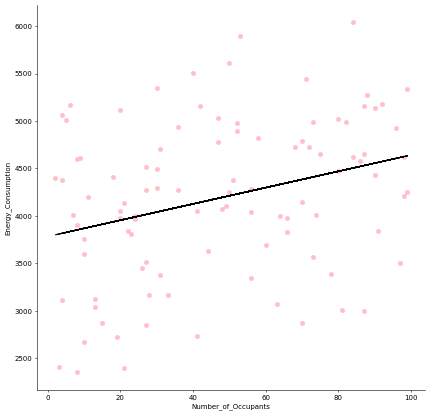

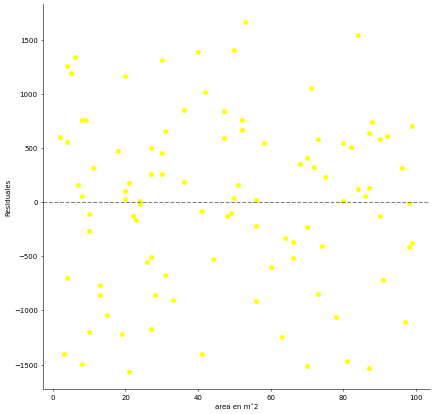

In [343]:
#Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10), dpi = 50)
plt.scatter(x, y, label = "Energy_Consumption", color = 'pink')
plt.xlabel('Number_of_Occupants') # nombrar eje x
plt.ylabel('Energy_Consumption')       # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

#Coeficiente de correlación
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')

#Coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

#Residuales
residuales = modelo.resid
plt.figure(figsize = (10, 10), dpi = 50)
plt.scatter(x, residuales, color = 'yellow')
plt.xlabel('area en mˆ2')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

#Prueba de Shapiro.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#Prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

In [344]:
#c) Analiza si existe alguna relación evidente entre el conteo de aparatos (appliances) y el consumo de energía.

In [345]:
x = df["Appliances_Used"]
y = df["Energy_Consumption"]

In [346]:
#ANOVA

from statsmodels.formula.api import ols
import statsmodels.api as sm

# C() -> variable categórica
# H0: No hay diferencia entre grupos
# H1: Al menos un grupo es diferente

modelo_lineal = ols('Energy_Consumption ~ Appliances_Used', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
Appliances_Used,1.0,2.134848e+06,2.134848e+06,3.146678,0.079188
Residual,98.0,6.648759e+07,6.784448e+05,NaN,NaN


Coeficiente de correlación:  0.1764

Coeficiente de determinación:  0.0311

valor-p de Shapiro:  0.1920

valor_p de Breusch-Pagan:  0.1031



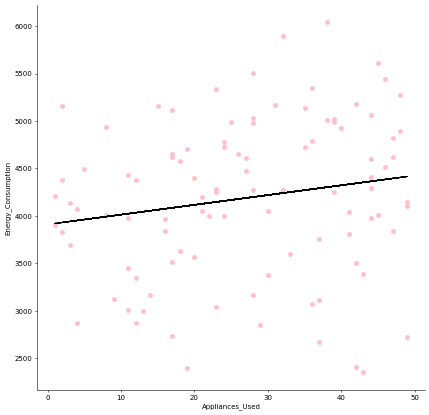

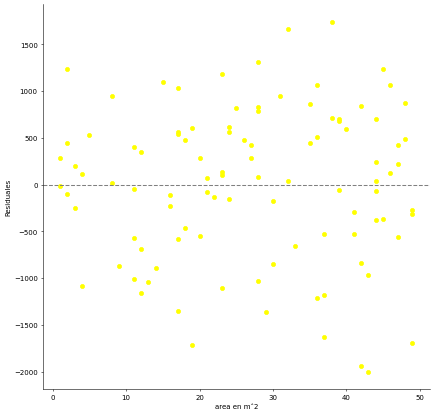

In [347]:
#Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10), dpi = 50)
plt.scatter(x, y, label = "Energy_Consumption", color = 'pink')
plt.xlabel('Appliances_Used') # nombrar eje x
plt.ylabel('Energy_Consumption')       # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

#Coeficiente de correlación
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')

#Coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

#Residuales
residuales = modelo.resid
plt.figure(figsize = (10,10), dpi = 50)
plt.scatter(x, residuales, color = 'yellow')
plt.xlabel('area en mˆ2')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

#Prueba de Shapiro.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#Prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

In [348]:
#d) Considerando los registros, ¿cómo influye el tipo de edificio (building_type) en el consumo de energía? Comenta diferencias entre categorías.

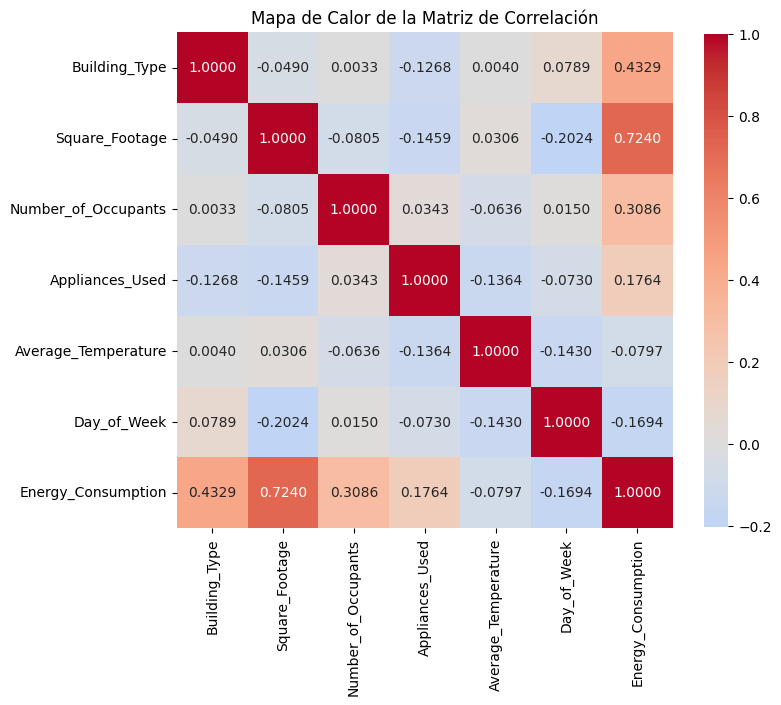

In [349]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".4f",
            square=True,
            center=0,
            cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

In [350]:
#e) Propón una expresión matemática que permita estimar energy_kwh a partir de los atributos del edificio y el entorno (elige las variables que consideres más relevantes y justifícalo).

In [356]:
import statsmodels.api as sm

# Variables independientes (based on previous analysis)
X = df[['Square_Footage', 'Building_Type', 'Number_of_Occupants','Appliances_Used', 'Average_Temperature']]
X = sm.add_constant(X)  # agrega el intercepto

# Variable dependiente
y = df['Energy_Consumption']

# Ajuste del modelo
model = sm.OLS(y, X).fit()

# Mostrar los coeficientes
print(model.summary())

print(modelo.params)

                            OLS Regression Results                            
Dep. Variable:     Energy_Consumption   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.269e+04
Date:                Sat, 01 Nov 2025   Prob (F-statistic):          3.54e-143
Time:                        04:35:18   Log-Likelihood:                -459.02
No. Observations:                 100   AIC:                             930.0
Df Residuals:                      94   BIC:                             945.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1495.4593    

In [352]:
print(modelo.params)

const              3909.413299
Appliances_Used      10.313867
dtype: float64


In [353]:
#f) Evalúa la utilidad práctica de la expresión del inciso anterior para realizar estimaciones en otros casos (considera el desempeño out-of-sample, posibles sesgos y límites de uso).

In [354]:
print("R-cuadrado:", model.rsquared)
print("Valor p del modelo:", model.f_pvalue)


R-cuadrado: 0.9978193965482172
Valor p del modelo: 1.8501471531073729e-125


In [355]:
#g) Para el siguiente caso hipotético, estima el consumo esperado e interpreta brevemente:
#building_type: Industrial
#square_footage: 12 500
#occupants: 12
#appliances: 30
#avg_temperature: 25 °C
#day_of_week: Wednesday